In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_2015 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=0)
df_2015.to_csv('capturas_2015-2020_año2015.csv', index=False)

In [3]:
df_2017 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=3)
df_2017.to_csv('capturas_2015-2020_año2017.csv', index=False)

In [4]:
df_2020 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name=6)
df_2020.to_csv('capturas_2015-2020_año2020.csv', index=False)

In [5]:
df_2015 = pd.read_csv('capturas_2015-2020_año2015.csv')
df_2017 = pd.read_csv('capturas_2015-2020_año2017.csv')
df_2020 = pd.read_csv('capturas_2015-2020_año2020.csv')

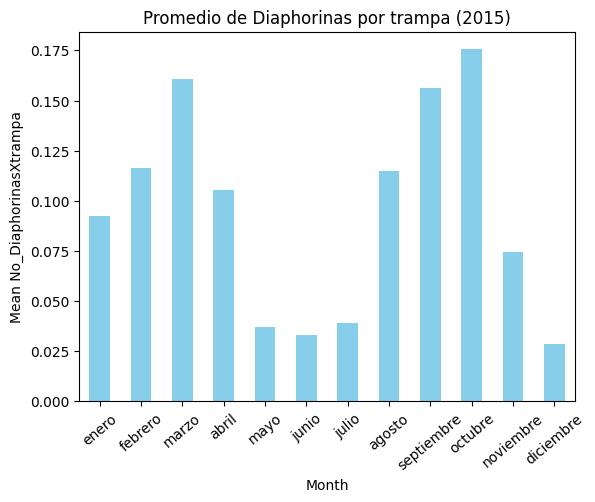

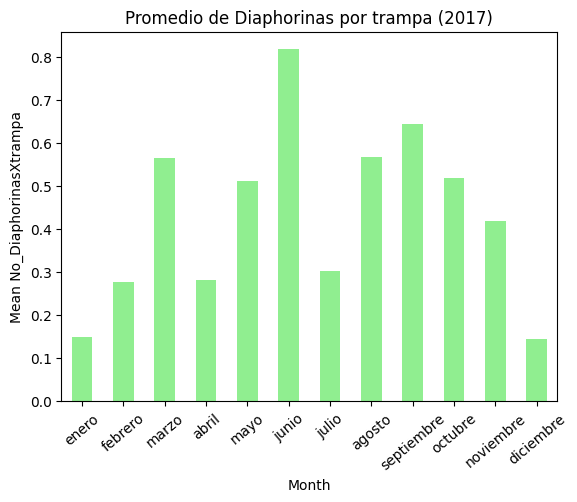

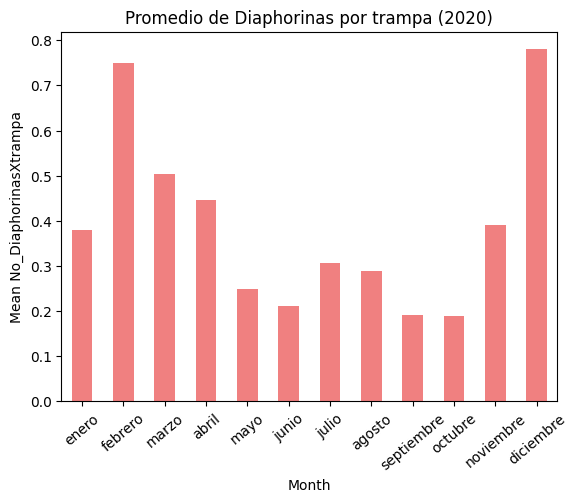

In [6]:
# Drop rows with NaN values in 'Fecha' column
df_2015 = df_2015.dropna(subset=['Fecha'])

# Filter the dataframe for the year 2015
# Define the month names in Spanish
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
# Group by month and calculate the mean of No_DiaphorinasXtrampa
monthly_mean = df_2015.groupby('Mes')['No_DiaphorinasXtrampa'].mean()

# Plot the bar graph
#plt.figure(figsize=(10, 6))
monthly_mean.plot(kind='bar', color='skyblue')
plt.title('Promedio de Diaphorinas por trampa (2015)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(12), labels=month_names, rotation=40)
plt.show()

# Drop rows with NaN values in 'Fecha' column
df_2017 = df_2017.dropna(subset=['Fecha'])

# Filter the dataframe for the year 2015
# Define the month names in Spanish
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
# Group by month and calculate the mean of No_DiaphorinasXtrampa
monthly_mean = df_2017.groupby('Mes')['No_DiaphorinasXtrampa'].mean()

# Plot the bar graph
#plt.figure(figsize=(10, 6))
monthly_mean.plot(kind='bar', color='lightgreen')
plt.title('Promedio de Diaphorinas por trampa (2017)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(12), labels=month_names, rotation=40)
plt.show()

# Drop rows with NaN values in 'Fecha' column
df_2020 = df_2020.dropna(subset=['Fecha'])

# Filter the dataframe for the year 2015
# Define the month names in Spanish
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
# Group by month and calculate the mean of No_DiaphorinasXtrampa
monthly_mean = df_2020.groupby('Mes')['DiaphorinaXTrampa'].mean()

# Plot the bar graph
#plt.figure(figsize=(10, 6))
monthly_mean.plot(kind='bar', color='lightcoral')
plt.title('Promedio de Diaphorinas por trampa (2020)')
plt.xlabel('Month')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(12), labels=month_names, rotation=40)
plt.show()

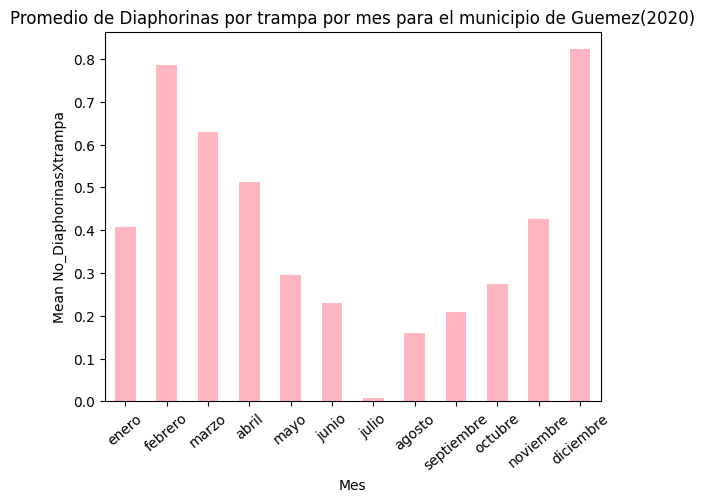

In [10]:
# Drop rows with NaN values in 'Fecha' column
df_2020 = df_2020.dropna(subset=['Fecha'])

df_2020_guemez = df_2020[df_2020['Municipio'] == 'GUEMEZ']

# Filter the dataframe for the year 2015
# Define the month names in Spanish
month_names = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
# Group by month and calculate the mean of No_DiaphorinasXtrampa
monthly_mean = df_2020_guemez.groupby('Mes')['DiaphorinaXTrampa'].mean()

# Plot the bar graph
#plt.figure(figsize=(10, 6))
monthly_mean.plot(kind='bar', color='lightpink')
plt.title('Promedio de Diaphorinas por trampa por mes para el municipio de Guemez(2020)')
plt.xlabel('Mes')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.xticks(ticks=range(12), labels=month_names, rotation=40)
plt.show()

In [90]:
df_2015['Fecha'] = pd.to_datetime(df_2015['Fecha'])
df_2015['Month'] = df_2015['Fecha'].dt.month
summary_df = df_2015.groupby(['Month', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg('mean').reset_index()

coef_disp = summary_df.groupby('Month')['No_DiaphorinasXtrampa'].agg(lambda x: x.var() / x.mean()).reset_index(name='Id')
coef_cx = summary_df.groupby('Month')['No_DiaphorinasXtrampa'].agg(lambda x: (x.var() / x.mean() - 1)/ (x.sum()-1)).reset_index(name='Cx')

monthly_summary = pd.merge(coef_disp, coef_cx, on='Month')

monthly_summary.head(20)


,Month,Id,Cx
0,1,0.983414,-0.004384
1,2,1.300031,0.000330
2,3,1.695463,0.000530
3,4,0.878201,-0.000171
4,5,0.737925,-0.000880
5,6,1.338007,0.001330
6,7,1.681968,0.002132
7,8,2.537507,0.001734
8,9,3.004288,0.001564
9,10,4.523984,0.002683


In [95]:
import pandas as pd

# Define the file name
file_name = 'capturas_2015-2020.xlsx'

# Create a list to hold DataFrames
dataframes = []

# Define the columns to keep for each sheet
columns_to_keep = {
    0: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    1: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    2: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    3: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    4: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    5: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa'],
    6: ['Fecha', 'Latitud', 'Longitud', 'Ubicacion', 'No_DiaphorinasXtrampa']
}
# Read each sheet and append the selected columns to the list
for sheet_index in range(7):
    df = pd.read_excel(file_name, sheet_name=sheet_index)
    
    # Keep only the required columns
    df = df[columns_to_keep[sheet_index]]
    dataframes.append(df)

# Concatenate all DataFrames
final_df = pd.concat(dataframes, ignore_index=True)

# Save to CSV
final_df.to_csv('capturas_2015-2020_concat.csv', index=False)


In [139]:
# Drop rows with NaN values in 'Fecha' column
df = df.dropna(subset=['Fecha'])

# Convert 'Fecha' column to datetime, specifying the format for 2019 and 2020
df.loc[df['Fecha'].str.contains('2019|2020'), 'Fecha'] = pd.to_datetime(df.loc[df['Fecha'].str.contains('2019|2020'), 'Fecha'], format='%d/%m/%Y').dt.strftime('%m/%d/%Y')

# Verify the changes
df.head()
df.to_csv('capturas_2015-2020_concat_version.csv', index=False)

In [168]:
df= pd.read_csv('capturas_2015-2020_concat_version.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Month'] = df['Fecha'].dt.month

summary_df = df.groupby(['Month', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg('mean').reset_index()

coef_disp = summary_df.groupby('Month')['No_DiaphorinasXtrampa'].agg(lambda x: x.var() / x.mean()).reset_index(name='Id')
coef_cx = summary_df.groupby('Month')['No_DiaphorinasXtrampa'].agg(lambda x: (x.var() / x.mean() - 1)/ (x.sum()-1)).reset_index(name='Cx')

monthly_summary = pd.merge(coef_disp, coef_cx, on='Month')

monthly_summary.head(20)


,Month,Id,Cx
0,1,1.764652,0.000285
1,2,2.434544,0.000286
2,3,3.547276,0.000428
3,4,1.982853,0.000293
4,5,3.543448,0.000549
5,6,13.253200,0.002319
6,7,3.526464,0.000708
7,8,2.285468,0.000269
8,9,2.593931,0.000258
9,10,4.174332,0.000546


<Figure size 1200x800 with 0 Axes>

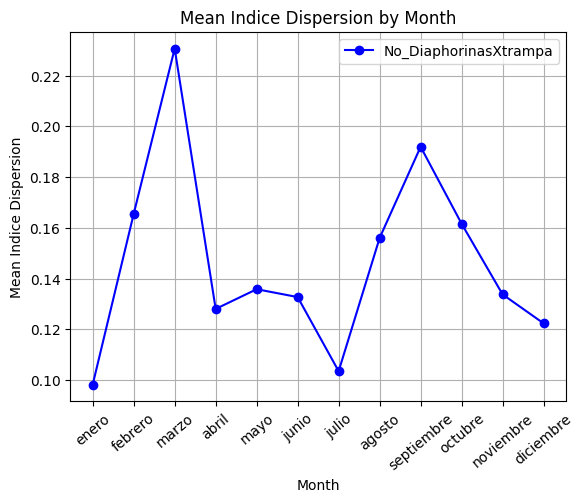

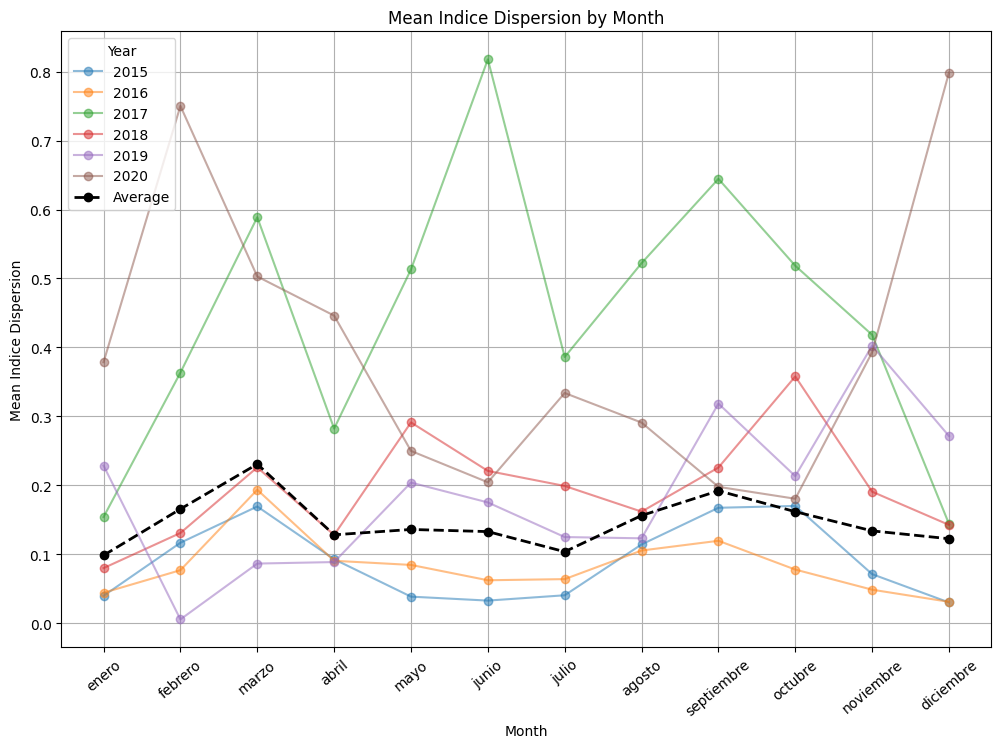

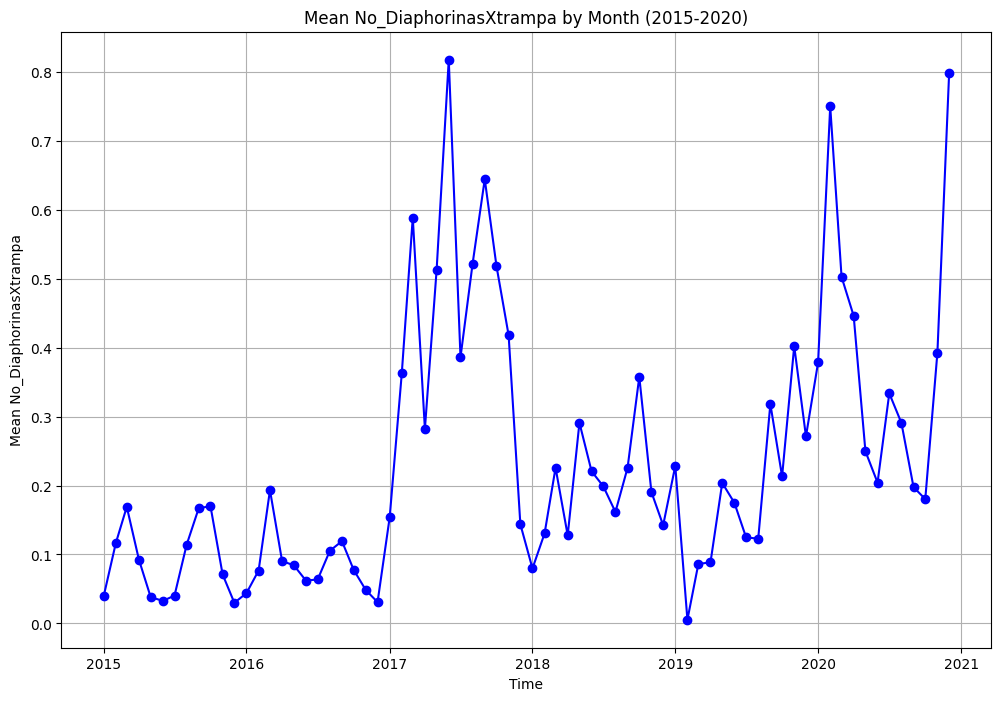

In [169]:
df= pd.read_csv('capturas_2015-2020_concat_version.csv')
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Month'] = df['Fecha'].dt.month

df_monthly = df.groupby('Month')['No_DiaphorinasXtrampa'].agg('mean').reset_index()
# Plot the line graph
plt.figure(figsize=(12, 8))
df_monthly.plot(x='Month', y='No_DiaphorinasXtrampa', kind='line', marker='o', color='b')
plt.title('Mean Indice Dispersion by Month')
plt.xlabel('Month')
plt.ylabel('Mean Indice Dispersion')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=40)
plt.grid(True)
plt.show()

# Extract year and month from the 'Fecha' column
df['Year'] = df['Fecha'].dt.year
# Extract year and month from the 'Fecha' column
df['Month'] = df['Fecha'].dt.month

# Plot the line graph with different colors for each year
plt.figure(figsize=(12, 8))
for year in df['Year'].unique():
    df_yearly = df[df['Year'] == year].groupby('Month')['No_DiaphorinasXtrampa'].mean().reset_index()
    plt.plot(df_yearly['Month'], df_yearly['No_DiaphorinasXtrampa'], marker='o', label=str(year), alpha=0.5)

# Calculate and plot the average of all years for each month
df_avg = df.groupby('Month')['No_DiaphorinasXtrampa'].mean().reset_index()
plt.plot(df_avg['Month'], df_avg['No_DiaphorinasXtrampa'], marker='o', color='black', linestyle='--', label='Average', linewidth=2)

plt.title('Mean Indice Dispersion by Month')
plt.xlabel('Month')
plt.ylabel('Mean Indice Dispersion')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=40)
plt.grid(True)
plt.legend(title='Year')
plt.show()


# Extract year and month from the 'Fecha' column
df['Year'] = df['Fecha'].dt.year
df['Month'] = df['Fecha'].dt.month

# Group by year and month and calculate the mean of 'No_DiaphorinasXtrampa'
df_continuous = df.groupby(['Year', 'Month'])['No_DiaphorinasXtrampa'].mean().reset_index()

# Create a continuous time index for plotting
df_continuous['Time'] = df_continuous['Year'].astype(str) + '-' + df_continuous['Month'].astype(str).str.zfill(2)
df_continuous['Time'] = pd.to_datetime(df_continuous['Time'])

# Plot the line graph
plt.figure(figsize=(12, 8))
plt.plot(df_continuous['Time'], df_continuous['No_DiaphorinasXtrampa'], marker='o', color='b')
plt.title('Mean No_DiaphorinasXtrampa by Month (2015-2020)')
plt.xlabel('Time')
plt.ylabel('Mean No_DiaphorinasXtrampa')
plt.grid(True)
plt.show()


In [136]:
df.head()

,Fecha,Latitud,Longitud,Ubicacion,No_DiaphorinasXtrampa,Month,Year
0,2015-01-22,24.11564,-99.03734,177_THUE05-28-030-0415T01,0.0,1,2015
1,2015-01-29,24.11564,-99.03734,177_THUE05-28-030-0415T01,0.0,1,2015
2,2015-01-29,24.11562,-99.03560,177_THUE05-28-030-0415T02,0.0,1,2015
3,2015-01-22,24.11562,-99.03560,177_THUE05-28-030-0415T02,0.0,1,2015
4,2015-01-29,24.11726,-99.03528,177_THUE05-28-030-0415T03,0.0,1,2015
